## Module_2:

## Team Members:
Medha Tadavarthi, Maggie Novak

## Project Title:
Spatial Distribution of Fibrosis in the Murine Bleomycin Model of Lung Fibrotic Disease



## Project Goal:
The goal of our project was to help inform the development of a new lung biopsy device for our company.


As a first step, our team has developed an image analysis pipeline that predicts the percentage of fibrotic tissue at different biopsy depths.


This project seeks to answer two questions: 
1) How does the extent of fibrosis vary throughout the depth of a fibrotic lung? 
2) And, using interpolation, can we predict the amount of fibrosis at a specific depth into the lung? 

 

## Disease Background: 
Disease Background:
* Prevalence & incidence: A meta-analysis of studies conducted between 1984 and 2021 found that in North America, the pooled incidence of IPF was approximately 9.0 cases per 100,000 persons per year and the pooled prevalence of IPF was about 27.2 cases per 100,000 persons. (Golchin S, Sayehmiri F, Ghanei M, et al. Global and regional estimates of idiopathic pulmonary fibrosis incidence and prevalence: a systematic review and meta-analysis. BMC Pulmonary Medicine; 2025.)

* Risk factors (genetic, lifestyle): The cause of IPF is idiopathic, but primary risk factors include old age, being male, and tobacco smoking. Other possible risk factors include environmental or occupational exposures such as dust, metal particles, or fumes and, in some cases, genetic mutations. (Phạm, H. L. [Hùng Long Phạm]. (2018, January 3). Idiopathic pulmonary fibrosis causes, symptoms, diagnosis, treatment, pathology [Video]. YouTube. Https://www.youtube.com/watch?v=Z6_0WkceY88) 

* Symptoms: People with IPF have difficulty breathing, which gets worse as scarring spreads through the lungs. Many people also experience a dry, persistent cough and ongoing fatigue. During a physical exam, doctors may hear a crackling sound in the lungs, similar to the sound of Velcro being pulled apart. As the disease advances, low oxygen levels can cause the skin to appear bluish and lead to clubbing of the fingertips. (Genentech. Behind Each Breath: Shedding Light on Idiopathic Pulmonary Fibrosis. YouTube; 2020. Https://www.youtube.com/watch?v=s2owdwl5Vac) 

* Standard of care treatment(s): Lung scarring by IPF cannot be reversed, and there is no cure at this time. Some options to slow the progression of the disease and relieve symptoms include supplemental oxygen, pulmonary rehabilitation, and FDA-approved antifibrotic medicines. The only definitive treatment for severe cases is a lung transplant. (Genentech. Behind Each Breath: Shedding Light on Idiopathic Pulmonary Fibrosis. YouTube; 2020. Https://www.youtube.com/watch?v=s2owdwl5Vac) 

* Biological Mechanisms: Fibrosis begins when alveolar cells (cells lining the tiny air sacs where gas exchange occurs) are damaged, triggering fibroblasts to turn into myofibroblasts that overproduce collagen, thickening alveolar walls and reducing gas exchange. Scar tissue gradually builds up in the lungs, causing them to become stiff and less able to deliver oxygen to the bloodstream, as well as being much harder to fill with air. The difficulty to fill the alveoli with air leads to the reduced lung capacity. 


## Data-Set: 
"these data have not yet been published and they are "hot off the press", having been recently generated by the Peirce-Cottler Lab in collaboration with the Kim Lab (https://uvahealth.com/findadoctor/John-Kim-1407155682) in the Division of Pulmonary and Critical Care at UVA" (Dr. Peirce-Cottler, Fall 2025)

Unpublished data was collected by the Peirce-Cottler Lab (Dept. of Biomedical Engineering) and Kim Lab (Division of Pulmonary and Critical Care) at the University of Virginia School of Medicine. 

data collection:
A mouse was injected with bleomycin, which causes lung fibrosis. 3 weeks later, the mouse was humanely sacrificed and its lungs were collected. The lungs, after treatment by paraformaldehyde and mounted in gel or wax, were sliced with a microtome in the transverse plane. The slices were placed on microscope slides and immunostained using an antibody which highlights the protein of interest (myofibroblasts). An image was taken and the desmin signal (from the myofibroblasts) was converted to black and white. This was done for 78 slices at different depths of the lung, where white is a fibrotic lesion.

## Data Analyis: 
#### FINAL CODE (import images, count white pixels, calculate percent, graph depth v white pixel percent, interpolate a point and plot it)

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 81014
Black pixels in image 1: 4113290

White pixels in image 2: 369855
Black pixels in image 2: 3824449

White pixels in image 3: 91653
Black pixels in image 3: 4102651

White pixels in image 4: 186078
Black pixels in image 4: 4008226

White pixels in image 5: 59426
Black pixels in image 5: 4134878

White pixels in image 6: 137592
Black pixels in image 6: 4056712

Percent white px:
C:\Users\MagPi\comp bme module 2\MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

C:\Users\MagPi\comp bme module 2\MASK_Sk658 Llobe ch010174.jpg:
1.9315242767333984% White | Depth: 3100 microns

C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010089.jpg:
8.81803035736084% White | Depth: 10000 microns

C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010134.jpg:
2.185177803039551% White | Depth: 4500 microns

C:\Users\MagPi\comp bme module 2\MASK

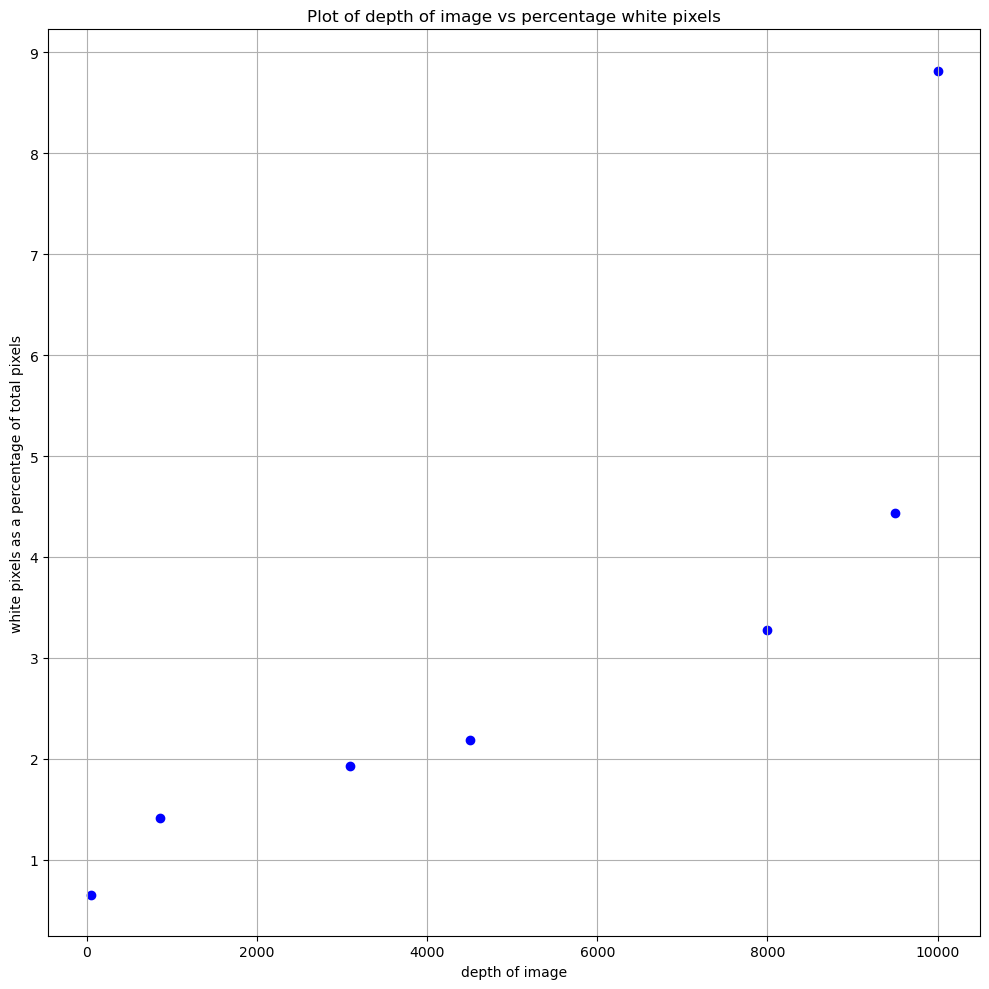

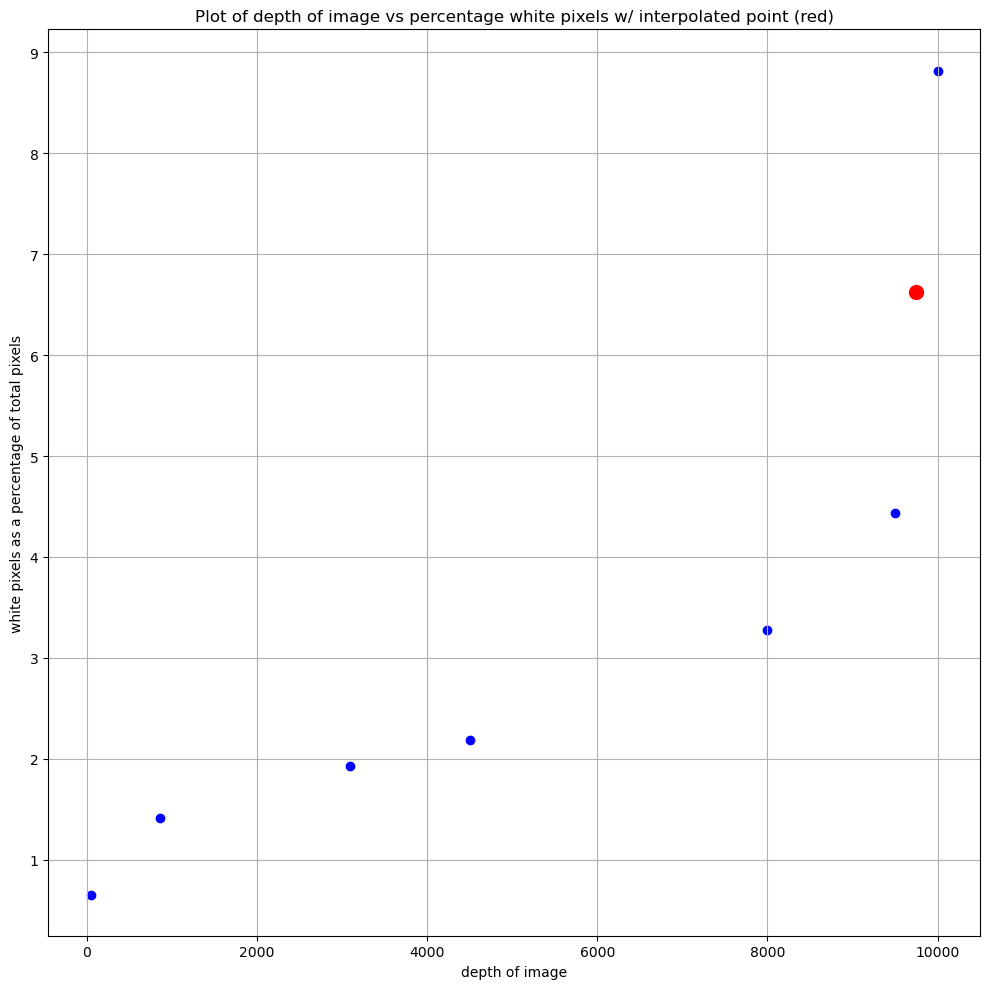

In [1]:
'''Module 2: count black and white pixels in a .jpg and interpolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"C:\Users\MagPi\comp bme module 2\MASK_Sk658 Llobe ch010017.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_Sk658 Llobe ch010174.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010089.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010134.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010135.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010159.jpg",
    r"C:\Users\MagPi\comp bme module 2\MASK_SK658 Slobe ch010119.jpg"]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    3100,
    10000,
    4500,
    9500,
    860,
    8000
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('C:/Users/MagPi/comp bme module 2/compbme_mod2/Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)

plt.figure(figsize=(10, 10))
plt.scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
plt.title('Plot of depth of image vs percentage white pixels')
plt.xlabel('depth of image')
plt.ylabel('white pixels as a percentage of total pixels')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 10))
plt.scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
plt.title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
plt.xlabel('depth of image')
plt.ylabel('white pixels as a percentage of total pixels')
plt.grid(True)
plt.scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#end of program

## Verify and validate your analysis: 
verification:
The data follows a reasonable cubic curve.

No percentages are over 100% or less than 0.

The curve shows higher values with depth.

Validation:
Interpolate using all three curve styles and a point in the dataset (depth: 9500).

All the percentages were identical to the value calculated from the image, up to 10-14: interpolation validated.

According to an article on the Annals of the American Thoracic Society1 “most cases of pulmonary fibrosis are associated with a usual interstitial pneumonia (UIP) pattern” and “The vast majority of cases of UIP demonstrate basilar zonal preponderance” (Matyga et al., 2022).
Meaning: for most cases of IPF, the scarring is most commonly found at the base of the lung.
The result of higher percent of scar tissue (white) deeper in the lung is validated.

Note: Google AI overview summarizes that scarring is usually more severe at the bottom and outer regions of the lung and cites gravity as the reason. All of the articles used to form this response do not contain the word ‘gravity’ and actually focus more on the scarring beginning on the outside of the lung and the center of the lung being the least affected.

According to an article from the National Library of Medicine2, the increase of fibrosis with depth still matches our results: “Imaging techniques, particularly computed tomography scans, frequently display a distinctive pattern of fibrosis, typically observed at the periphery of both lungs and more prominently concentrated at the bases” (Sankari et al., 2024).



## Conclusions and Ethical Implications: 
Conclusions:

The percent of fibrotic tissue increased with lung depth, showing that fibrosis is more severe in deeper regions.
A biopsy device should be designed to reach deeper lung regions to capture the most affected tissue and detect significant changes in fibrosis, while avoiding unnecessary extension into regions that pose a higher risk of bleeding or injury.

Ethical Implications:

Deeper biopsies carry greater clinical risks, including potential bleeding or lung collapse.
Mouse lung model does not fully replicate human lung structure or fibrosis distribution, so any future device applications must undergo proper clinical validation with a diverse data set before being applied to patients.


## Limitations and Future Work:
Limitations:
Only one mouse data sample.
Only 7 images were used.
A mouse may not be an accurate representation of a human lung (lobes not exactly the same, walk on all fours instead of vertical-gravity change, smaller).

Future Work:

Analyze all 78 images. Use a human model.

Analyze lungs at multiple time points after bleomycin injury to observe when fibrosis first appears and how it progresses over time.
Correlate fibrosis with tissue stiffness to understand how mechanical resistance changes with depth, informing device design and insertion depth and force.
Explore whether imaging or sensing technologies could estimate fibrotic density in a safer and more accessible way.


## NOTES FROM YOUR TEAM: 
Medha worked on the beginning code and disease background and Maggie assembled and turned in the jupyter notebook and created a github. We worked remotely this time. As of 10/7.

We continued to work remotely. Maggie finished the code and image analysis and graphed the results. Maggie created the slides for analysis steps, results, and validation/verification and assembled the final Jupyter notebook(adding 'limitations' as well as all of her parts). Medha produced the goal, background, and conclusions/ethical implications slides. As of 10/16.

References:
1 Matyga, A. W., Chelala, L., & Chung, J. H. (2022, November 1). Upper Lobe Pulmonary fibrosis: An atypical location for pulmonary fibrosis | annals of the American Thoracic Society. Upper Lobe Pulmonary Fibrosis: An Atypical Location for Pulmonary Fibrosis. https://www.atsjournals.org/doi/10.1513/AnnalsATS.202210-861CC 
2 Sankari, A., Chapman, K., & Ullah, S. (2024, April 23). Idiopathic pulmonary fibrosis. StatPearls [Internet]. https://www.ncbi.nlm.nih.gov/books/NBK448162/#:~:text=Imaging%20techniques%2C%20particularly%20computed%20tomography,as%20the%20sole%20curative%20option. 
3 National Heart, Lung, and Blood Institute (NIH). (2013, November 12). Diagram showing normal and fibrotic lungs (IPF). Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Ipf_NIH.jpg
4 Johns Hopkins Medicine. (n.d.). Lung biopsy. Johns Hopkins Medicine. https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lung-biopsy




## QUESTIONS FOR YOUR TA: 
*None so far, we're doing well!*